Part 1 Load the data and make a datetime index

In [1]:
import pandas as pd
import datetime as dt
# Load the data
file_path = r'C:\Users\James\OneDrive\Desktop\london_weather.csv'
df = pd.read_csv(file_path)

df.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [3]:
df.index

RangeIndex(start=0, stop=15341, step=1)

In [4]:
df.loc[15340]

date                20201231.0
cloud_cover                7.0
sunshine                   1.3
global_radiation          34.0
max_temp                   1.5
mean_temp                 -0.8
min_temp                  -3.1
precipitation              0.0
pressure              100500.0
snow_depth                 NaN
Name: 15340, dtype: float64

In [5]:
# Convert the date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [6]:
# Set the date column as the index
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [7]:
df.head(1)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0


In [8]:
# Filter out only the required data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth',]]

df['precipitation'].fillna(0, inplace=True)
df['snow_depth'].fillna(0, inplace=True)
df.fillna(method='ffill', inplace=True) 

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   max_temp       7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [9]:
df.head(20)

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
2000-01-06,0.0,8.9,7.0,11.0,0.0
2000-01-07,2.0,7.2,3.4,9.2,0.0
2000-01-08,0.0,7.4,5.7,7.2,0.0
2000-01-09,0.2,3.2,-0.7,7.8,0.0


Part 2 Q1: What month had the most precipitation between 2000 through 2010? 
Jan 2014 and 162.4 inches

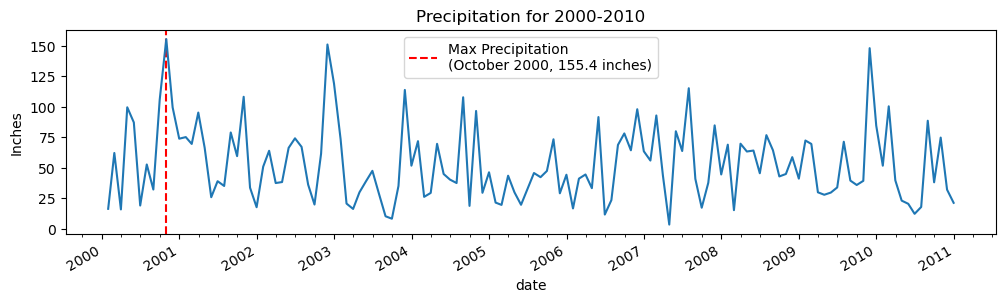

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
precipitation_monthly = df['precipitation'].resample('M').sum()
precipitation_monthly = precipitation_monthly.loc['2000':'2010']

# Find the date and corresponding value for the max precipitation
max_precipitation_date = precipitation_monthly.idxmax()
max_precipitation_value = precipitation_monthly.max()

# Plot the feature and time period
fig, ax = plt.subplots(figsize=(12, 3))
ax.axvline(max_precipitation_date, color='red', linestyle='--', 
           label=f'Max Precipitation\n({max_precipitation_date.strftime("%B %Y")}, {max_precipitation_value} inches)')

# Visualization Requirements
ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')

# Set major ticks every year and minor ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')

fig.autofmt_xdate(rotation=90)
ax.legend()
precipitation_monthly.plot(ax=ax, label='Monthly Precipitation')
plt.show()


In [11]:
precipitation_monthly.head(10)

date
2000-01-31     16.5
2000-02-29     62.2
2000-03-31     16.0
2000-04-30     99.6
2000-05-31     87.2
2000-06-30     19.2
2000-07-31     52.8
2000-08-31     32.3
2000-09-30    105.8
2000-10-31    155.4
Freq: M, Name: precipitation, dtype: float64

In [12]:
precipitation_monthly.max()

155.4

Which year between 2000-2020 had the coolest average temperature? 2010 at 10.6 degress

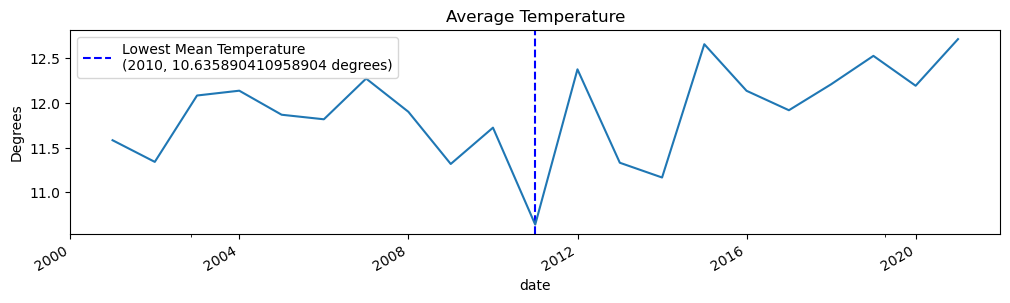

In [18]:
# Resample the mean_temp data to a Yearly frequency using .mean() as the aggregation method
mean_temp_yearly = df['mean_temp'].resample('Y').mean()
mean_temp_yearly = mean_temp_yearly.loc['2000':'2020']

# Determine the year and value for the lowest mean temp
lowest_mean_temp_year = mean_temp_yearly.idxmin()
lowest_mean_temp_value = mean_temp_yearly.min()

# Plot the feature and time period
fig, ax = plt.subplots(figsize=(12, 3))
ax.axvline(lowest_mean_temp_year, color='blue', linestyle='--', label=f'Lowest Mean Temperature\n({lowest_mean_temp_year.strftime("%Y")}, {lowest_mean_temp_value} degrees)')

# Visualization Requirements
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')
# ax.xaxis.set_major_locator(plt.MaxNLocator(4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(plt.MaxNLocator(1))
ax.xaxis.set_minor_formatter(plt.NullFormatter())
fig.autofmt_xdate(rotation=90)
ax.legend()
mean_temp_yearly.plot(ax=ax, label='Yearly Mean Temperature')
plt.show()